## Weather Data, or will it be cold on my birthday?

Station List: http://www.wetterzentrale.de/klima/stnlst.html

  * What are the historical weather trends in the region around my birthday?

In [18]:
%%sql --module weather
SELECT max_temperature AS temperature,
       TIMESTAMP(STRING(year) + '-' + STRING(month) + '-' + STRING(day)) AS timestamp
FROM [publicdata:samples.gsod]
WHERE station_number = 103810 AND year >= 1997
ORDER BY year DESC, month DESC, day DESC

In [19]:
%%chart annotation --fields timestamp,temperature --data weather

In [22]:
%%sql --module weather
SELECT max_temperature AS temperature,
       TIMESTAMP(STRING(year) + '-' + STRING(month) + '-' + STRING(day)) AS timestamp
FROM [publicdata:samples.gsod]
WHERE station_number = 115180 AND year >= 1997
ORDER BY year DESC, month DESC, day DESC

In [23]:
%%chart annotation --fields timestamp,temperature --data weather

In [24]:
from __future__ import division
import gcp.bigquery as bq
import matplotlib.pyplot as plot
import numpy as np

In [64]:
%%sql --module weather

SELECT rain, snow, hail, thunder, tornado, total_precipitation, snow_depth, mean_temp, year
FROM [publicdata:samples.gsod]
WHERE station_number = 115180 AND year >= 1980
AND MONTH=2 and DAY IN (6,7,8)

In [68]:
bday_df_weather = bq.Query(weather).to_dataframe()

In [69]:
bday_df_weather = bday_df_weather.set_index('year')
bday_df_weather = bday_df_weather.sort_index(axis=0)

In [70]:
bday_df_weather.describe()

,rain,snow,hail,thunder,tornado,total_precipitation,snow_depth,mean_temp
count,93,93,93,93,93,93.000000,33.000000,93.000000
mean,0.1505376,0.1505376,0.1505376,0.1505376,0.1505376,0.023441,2.533333,32.676344
std,0.3595358,0.3595358,0.3595358,0.3595358,0.3595358,0.048645,2.026491,9.379898
min,False,False,False,False,False,0.000000,0.400000,5.700000
25%,0,0,0,0,0,0.000000,1.600000,28.100000
50%,0,0,0,0,0,0.000000,2.000000,33.799999
75%,0,0,0,0,0,0.020000,2.800000,38.900002
max,True,True,True,True,True,0.280000,7.500000,51.599998


In [71]:
bday_df_weather[bday_df_weather['snow']]

,rain,snow,hail,thunder,tornado,total_precipitation,snow_depth,mean_temp
year,,,,,,,,
1982,True,True,True,True,True,0.08,NaN,36.700001
1982,True,True,True,True,True,0.01,NaN,26.500000
1983,True,True,True,True,True,0.00,2.0,28.299999
1989,True,True,True,True,True,0.01,NaN,31.600000
1990,True,True,True,True,True,0.00,NaN,31.299999
1993,True,True,True,True,True,0.00,NaN,34.200001
1993,True,True,True,True,True,0.00,2.0,25.400000
1994,True,True,True,True,True,0.00,NaN,33.900002
2001,True,True,True,True,True,0.00,NaN,38.200001


In [72]:
bday_df_weather[bday_df_weather['hail']]

,rain,snow,hail,thunder,tornado,total_precipitation,snow_depth,mean_temp
year,,,,,,,,
1982,True,True,True,True,True,0.08,NaN,36.700001
1982,True,True,True,True,True,0.01,NaN,26.500000
1983,True,True,True,True,True,0.00,2.0,28.299999
1989,True,True,True,True,True,0.01,NaN,31.600000
1990,True,True,True,True,True,0.00,NaN,31.299999
1993,True,True,True,True,True,0.00,NaN,34.200001
1993,True,True,True,True,True,0.00,2.0,25.400000
1994,True,True,True,True,True,0.00,NaN,33.900002
2001,True,True,True,True,True,0.00,NaN,38.200001


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c246b8690>]], dtype=object)

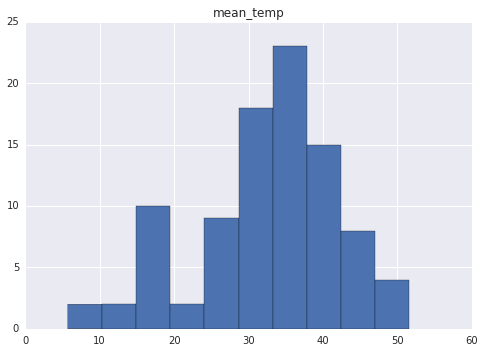

In [78]:
bday_df_weather.hist('mean_temp')

In [86]:
snow_depths = bday_df_weather[bday_df_weather['snow_depth'].notnull()]

In [93]:
snow_depths = snow_depths.reset_index().groupby('year').agg({'snow_depth': np.mean})

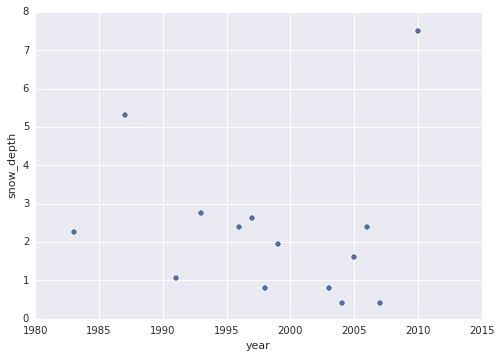

In [99]:
snow_depths.reset_index().plot(kind='scatter', x='year', y='snow_depth')